In [31]:
import numpy as np
import matplotlib.pyplot as plt
import GPy
import math
from IPython.display import display
from mpl_toolkits import mplot3d

import warnings
warnings.filterwarnings('ignore')
GPy.plotting.change_plotting_library('plotly_offline')

In [32]:
datum24 = np.load("dat24.txt.npy")
pw24 = np.array([[datum24[i,0], datum24[i,1]] for i in range(len(datum24))])
e224 = np.array([[datum24[i,2]] for i in range(len(datum24))])
e324 = np.array([[datum24[i,3]] for i in range(len(datum24))])
print(pw24)

[[0.         0.5       ]
 [0.         0.675     ]
 [0.         0.85      ]
 [0.         1.025     ]
 [0.08333334 0.5       ]
 [0.08333334 0.675     ]
 [0.08333334 0.85      ]
 [0.08333334 1.025     ]
 [0.16666667 0.5       ]
 [0.16666667 0.675     ]
 [0.16666667 0.85      ]
 [0.16666667 1.025     ]
 [0.25       0.5       ]
 [0.25       0.675     ]
 [0.25       0.85      ]
 [0.25       1.025     ]
 [0.33333334 0.5       ]
 [0.33333334 0.675     ]
 [0.33333334 0.85      ]
 [0.33333334 1.025     ]
 [0.41666666 0.5       ]
 [0.41666666 0.675     ]
 [0.41666666 0.85      ]
 [0.41666666 1.025     ]]


In [33]:
truth1 = 0.314
truth2 = 0.618
min1 = 0
max1 = 0.5
min2 = 0.5
max2 = 1.2
# replace outputs with trento calls when actually running
output1 = 0.35343085496915
output2 = 0.2073591476396
fake_exp_rel_uncert_1 = 0.05
theory_rel_uncert_1 = 0.05
fake_exp_rel_uncert_2 = 0.05
theory_rel_uncert_2 = 0.05

In [34]:
cml1 = e224
cml2 = e324
cul1 = cml1 * theory_rel_uncert_1
cul2 = cml2 * theory_rel_uncert_2

In [35]:
# define kernel
kerSmall = GPy.kern.Matern52(2, ARD=True) + GPy.kern.White(2)

# create simple GP model
mSmall = GPy.models.GPRegression(pw24, e224, kerSmall)

# optimize and plot
mSmall.optimize(messages=True, max_f_eval=1000)
figSmall = mSmall.plot()
display(GPy.plotting.show(figSmall, filename='basic_gp_regression_notebook_2d'))
display(mSmall)

None

GP_regression.,value,constraints,priors
sum.Mat52.variance,0.3803267458258093,+ve,
sum.Mat52.lengthscale,"(2,)",+ve,
sum.white.variance,7.387954250289767e-06,+ve,
Gaussian_noise.variance,7.387954250289767e-06,+ve,


In [36]:
def predict(x, gp):
    return gp.predict(x)

In [37]:
def prior():
    return 1

def likelihood():
    res = 0.0
    norm = 1.
    # Sum over observables
    data_mean1 = output1
    data_uncert1 = output1 * fake_exp_rel_uncert_1

    tmp_model_mean1, tmp_model_uncert1 = predict(pw24, mSmall)
    tmp_data_mean1 = data_mean1
    tmp_data_uncert1 = data_uncert1

    cov1 = (np.multiply(tmp_model_uncert1, tmp_model_uncert1) + 
            np.multiply(tmp_data_uncert1, tmp_data_uncert1))
    res += np.divide(np.power(tmp_model_mean1 - tmp_data_mean1, 2), cov1)
    norm *= 1 / np.sqrt(cov1)
    
    #Again
    data_mean2 = output1
    data_uncert2 = output1 * fake_exp_rel_uncert_1

    tmp_model_mean2, tmp_model_uncert2 = predict(pw24, mSmall)
    tmp_data_mean2 = data_mean2
    tmp_data_uncert2 = data_uncert2

    cov2 = (np.multiply(tmp_model_uncert2, tmp_model_uncert2) + 
            np.multiply(tmp_data_uncert2, tmp_data_uncert2))
    res += np.divide(np.power(tmp_model_mean2 - tmp_data_mean2, 2), cov2)
    norm *= 1 / np.sqrt(cov2)
    
    res *= -0.5
    return norm * np.exp(res)


def posterior():
    return prior() * likelihood()

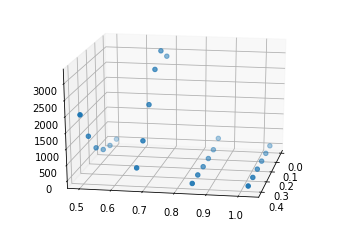

In [38]:
ax = plt.axes(projection='3d')
ax.scatter(xs=pw24[:,0], ys=pw24[:,1], zs=posterior())
ax.view_init(20, 10)

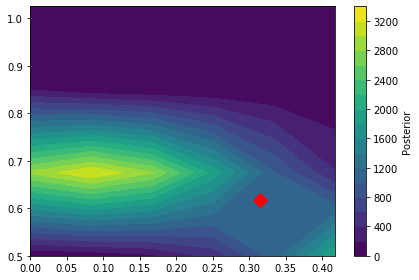

In [39]:
cs2 = plt.contourf(pw24[:,0].reshape(6,4), pw24[:,1].reshape(6,4), posterior().reshape(6,4), 20)

cbar2 = plt.colorbar(cs2, label="Posterior")

plt.plot(truth1, truth2, "D", color='red', ms=10)

plt.tight_layout()
plt.show()

In [40]:
#### Trento Example more points ####
datum = np.load("datPW.txt.npy")
pw = np.array([[datum[i,0], datum[i,1]] for i in range(len(datum))])
e2 = np.array([[datum[i,2]] for i in range(len(datum))])
e3 = np.array([[datum[i,3]] for i in range(len(datum))])
print(pw)

[[0.   0.5 ]
 [0.   0.51]
 [0.   0.52]
 ...
 [0.49 1.17]
 [0.49 1.18]
 [0.49 1.19]]


In [41]:
truth1 = 0.314
truth2 = 0.618
min1 = 0
max1 = 0.5
min2 = 0.5
max2 = 1.2
# replace outputs with trento calls when actually running
output1 = 0.346629636906475
output2 = 0.208528675428
fake_exp_rel_uncert_1 = 0.05
theory_rel_uncert_1 = 0.05
fake_exp_rel_uncert_2 = 0.05
theory_rel_uncert_2 = 0.05

In [42]:
cml1 = e2
cml2 = e3
cul1 = cml1 * theory_rel_uncert_1
cul2 = cml2 * theory_rel_uncert_2

In [43]:
# define kernel
ker = GPy.kern.Matern52(2, ARD=True) + GPy.kern.White(2)

# create simple GP model
mm = GPy.models.GPRegression(pw, e2, ker)

# optimize and plot
mm.optimize(messages=True, max_f_eval=1000)
fig = mm.plot()
display(GPy.plotting.show(fig, filename='basic_gp_regression_notebook_2d'))
display(mm)

None

GP_regression.,value,constraints,priors
sum.Mat52.variance,0.17291571110252862,+ve,
sum.Mat52.lengthscale,"(2,)",+ve,
sum.white.variance,1.5929287005742126e-05,+ve,
Gaussian_noise.variance,1.5929287005742126e-05,+ve,


In [44]:
def prior2():
    return 1

def likelihood2():
    res = 0.0
    norm = 1.
    # Sum over observables
    data_mean1 = output1
    data_uncert1 = output1 * fake_exp_rel_uncert_1

    tmp_model_mean1, tmp_model_uncert1 = predict(pw, mm)
    tmp_data_mean1 = data_mean1
    tmp_data_uncert1 = data_uncert1

    cov1 = (np.multiply(tmp_model_uncert1, tmp_model_uncert1) + 
            np.multiply(tmp_data_uncert1, tmp_data_uncert1))
    res += np.divide(np.power(tmp_model_mean1 - tmp_data_mean1, 2), cov1)
    norm *= 1 / np.sqrt(cov1)
    
    #Again
    data_mean2 = output1
    data_uncert2 = output1 * fake_exp_rel_uncert_1

    tmp_model_mean2, tmp_model_uncert2 = predict(pw, mm)
    tmp_data_mean2 = data_mean2
    tmp_data_uncert2 = data_uncert2

    cov2 = (np.multiply(tmp_model_uncert2, tmp_model_uncert2) + 
            np.multiply(tmp_data_uncert2, tmp_data_uncert2))
    res += np.divide(np.power(tmp_model_mean2 - tmp_data_mean2, 2), cov2)
    norm *= 1 / np.sqrt(cov2)
    
    res *= -0.5
    return norm * np.exp(res)


def posterior2():
    return prior2() * likelihood2()

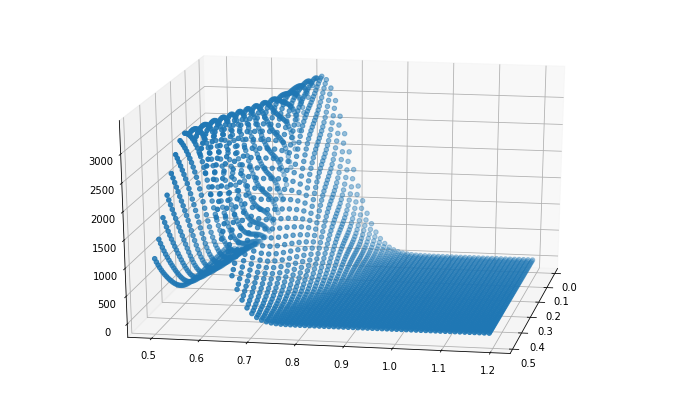

In [60]:
fig1 = plt.figure(figsize=(12,16))
ax = fig1.add_subplot(211,projection='3d')
ax.scatter(xs=pw[:,0], ys=pw[:,1], zs=posterior2())
ax.view_init(20, 10)

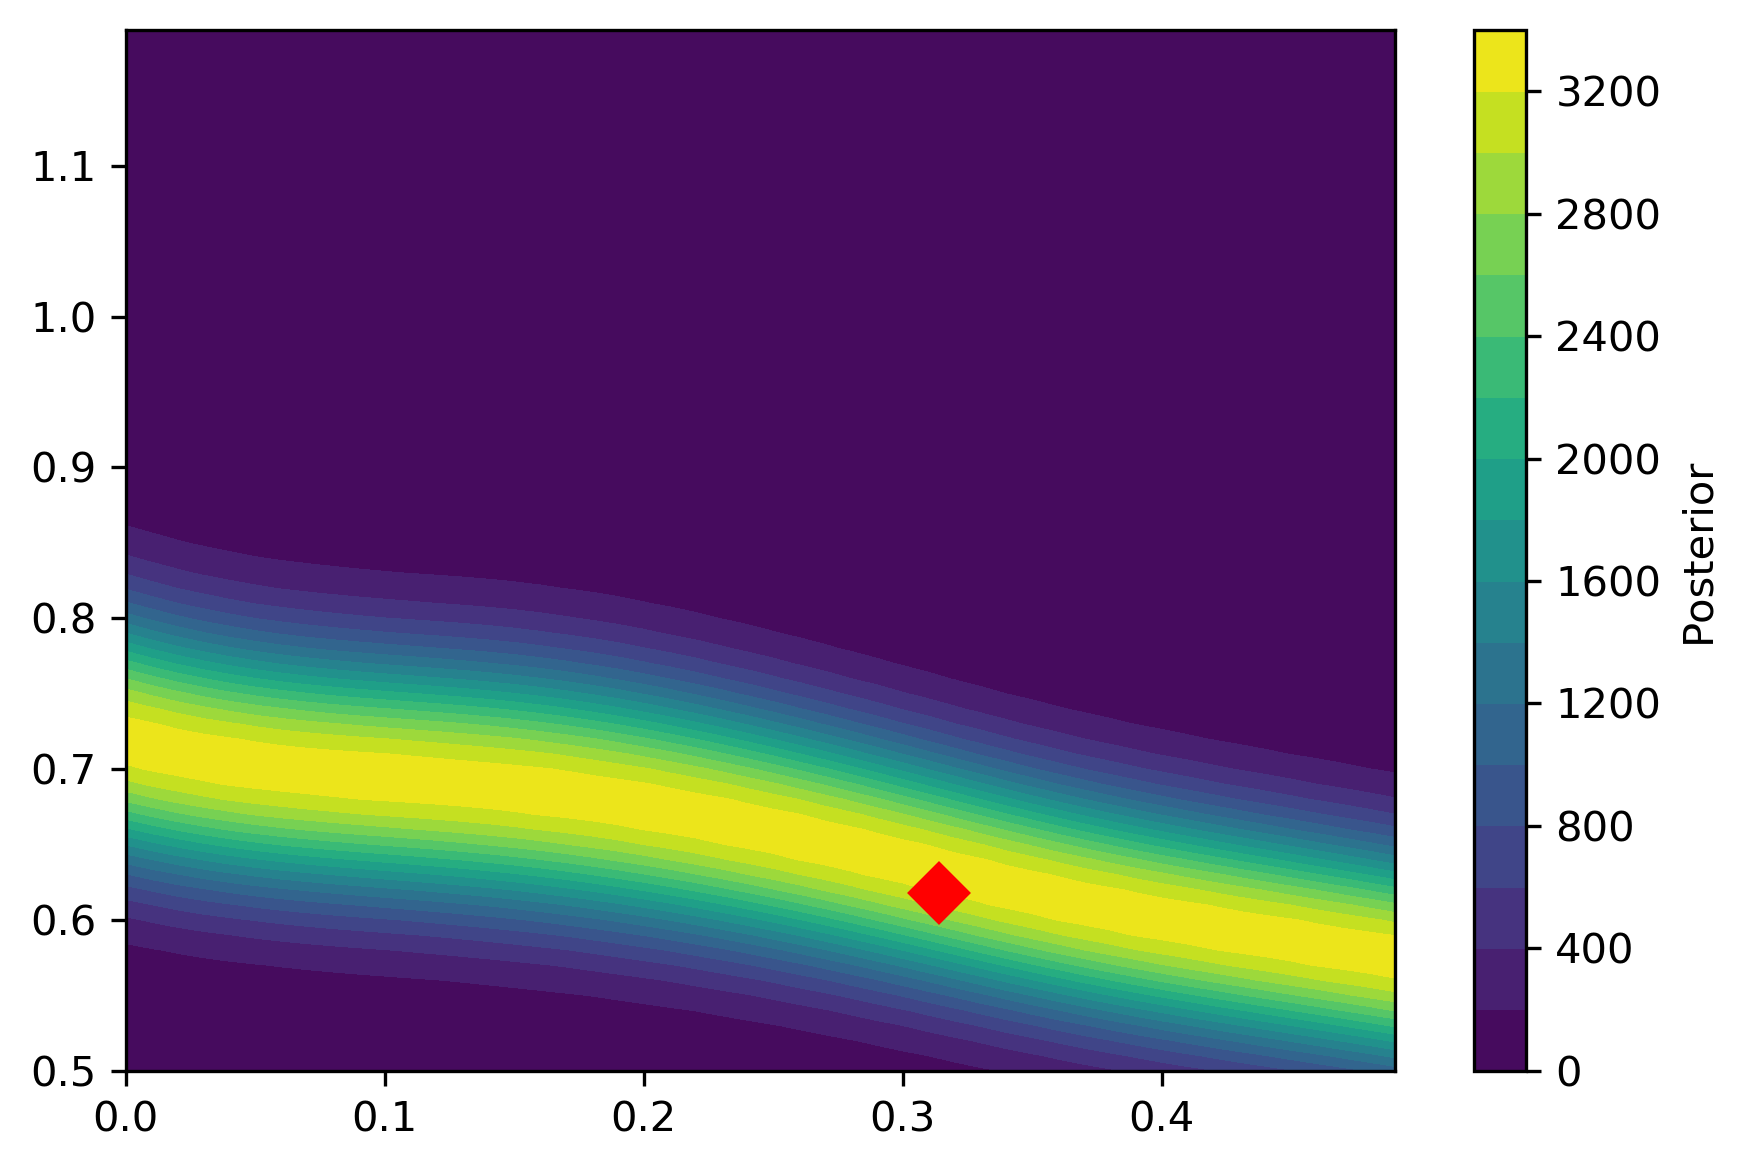

In [48]:
plt.figure(dpi=300)
cs2 = plt.contourf(pw[:,0].reshape(50,70), pw[:,1].reshape(50,70), posterior2().reshape(50,70), 20)

cbar2 = plt.colorbar(cs2, label="Posterior")

plt.plot(truth1, truth2, "D", color='red', ms=10)

plt.tight_layout()
plt.show()